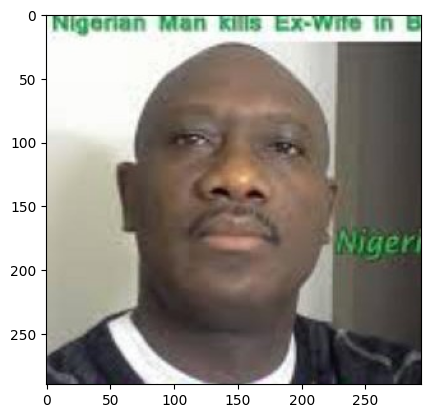

In [ ]:
'''
## 데이터 증강 Data Augmentation
CNN 모델의 성능을 높이고 오버피팅을 극복할 수 있는 가장 좋은 방법은 다양한 유형의 학습 이미지 데이터 양을 늘리는 것입니다. 
    하지만 이미지 데이터의 경우 학습 데이터 량을 늘리는 것은 쉽지가 않습니다. 
    데이터 증강(Data Augmentation)은 학습 이미지의 개수를 늘리는 것이 아니고 학습 시 마다 개별 원본 이미지를 변형해서 학습하는 것입니다.
[출처] https://lcyking.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%A6%9D%EA%B0%95Data-Augmentation
부족한 이미지가 있을 때, 회전/크기 조정 등으로 데이터 양을 늘린다.

- flip
좌우 반전 horizontal_flip
상하 반전 vertical_flip
True 값 입력

- rotaion

- zoom

- shift
좌우이동 width_shift_range
상하이동 height_shift_range
0 - 1 사이 값 입력

- shear

- bright
밝기 조절, 0(어둡게) - 1(밝게)

- channel shift

- normalization

'''

import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#cv2.imread는 이미지를 RGB가 아닌 BGR로 받아오기 때문에 바꿔 주어야함.
image = cv2.cvtColor(cv2.imread('/Users/bunny/Documents/person_img/31_0_1_20170116010511938.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(image)

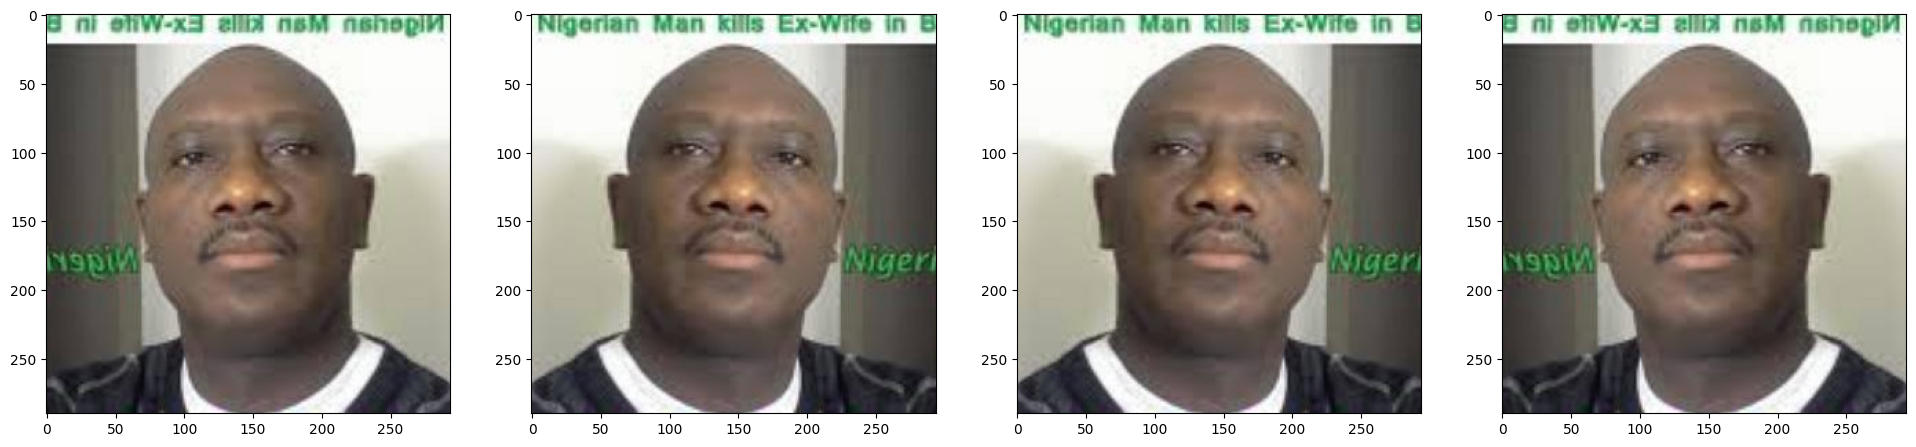

In [11]:
#augmentation이 적용된 image들을 시각화 해주는 함수
def show_aug_image(image, generator, n_images=4):
	
    # ImageDataGenerator는 여러개의 image를 입력으로 받기 때문에 4차원으로 입력 해야함.
    image_batch = np.expand_dims(image, axis=0)
	
    # featurewise_center or featurewise_std_normalization or zca_whitening 가 True일때만 fit 해주어야함
    generator.fit(image_batch) 
    # flow로 image batch를 generator에 넣어주어야함.
    data_gen_iter = generator.flow(image_batch)

    fig, axs = plt.subplots(nrows=1, ncols=n_images, figsize=(24, 8))

    for i in range(n_images):
    	#generator에 batch size 만큼 augmentation 적용(매번 적용이 다름)
        aug_image_batch = next(data_gen_iter)
        aug_image = np.squeeze(aug_image_batch)
        aug_image = aug_image.astype('int')
        axs[i].imshow(aug_image)
data_generator = ImageDataGenerator(horizontal_flip=True)
show_aug_image(image, data_generator, n_images=4)

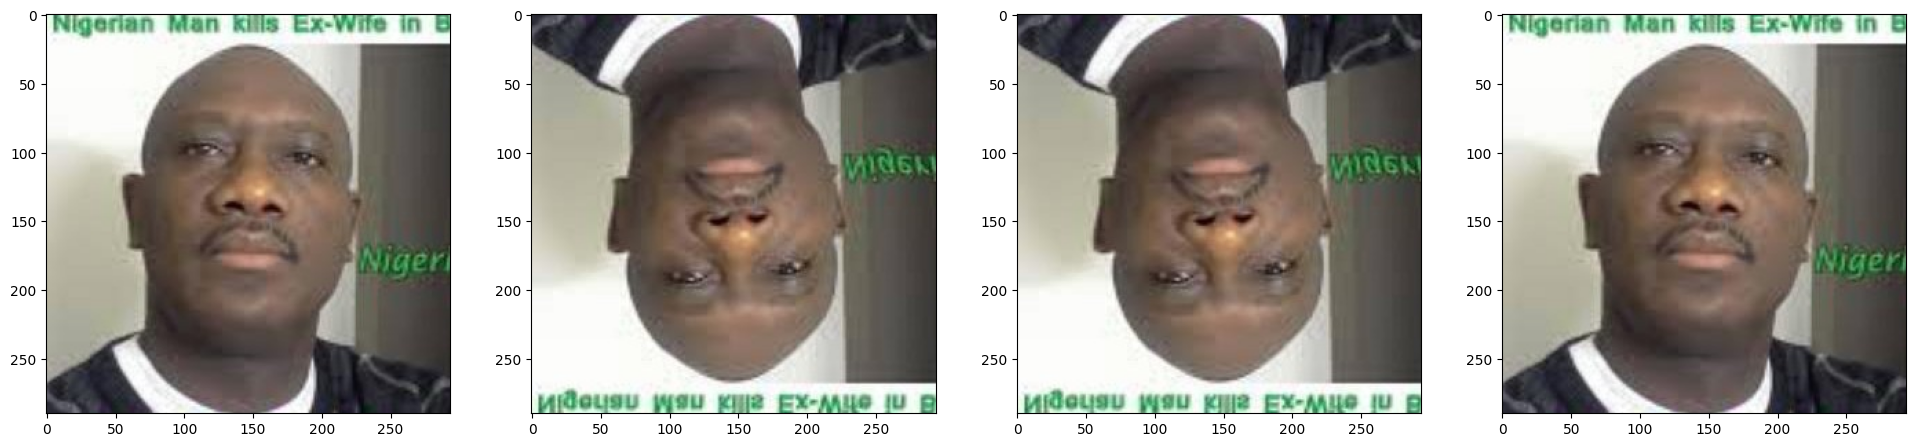

In [8]:
data_generator = ImageDataGenerator(vertical_flip=True)
show_aug_image(image, data_generator, n_images=4)

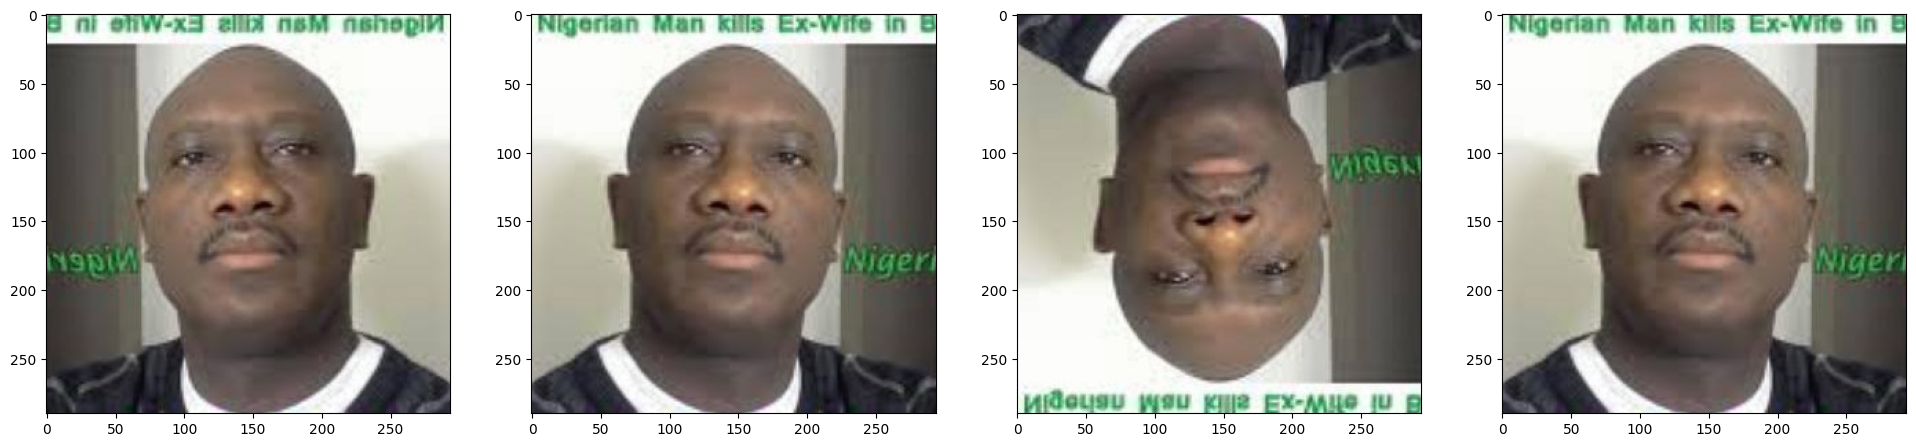

In [9]:
data_generator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
show_aug_image(image, data_generator, n_images=4)

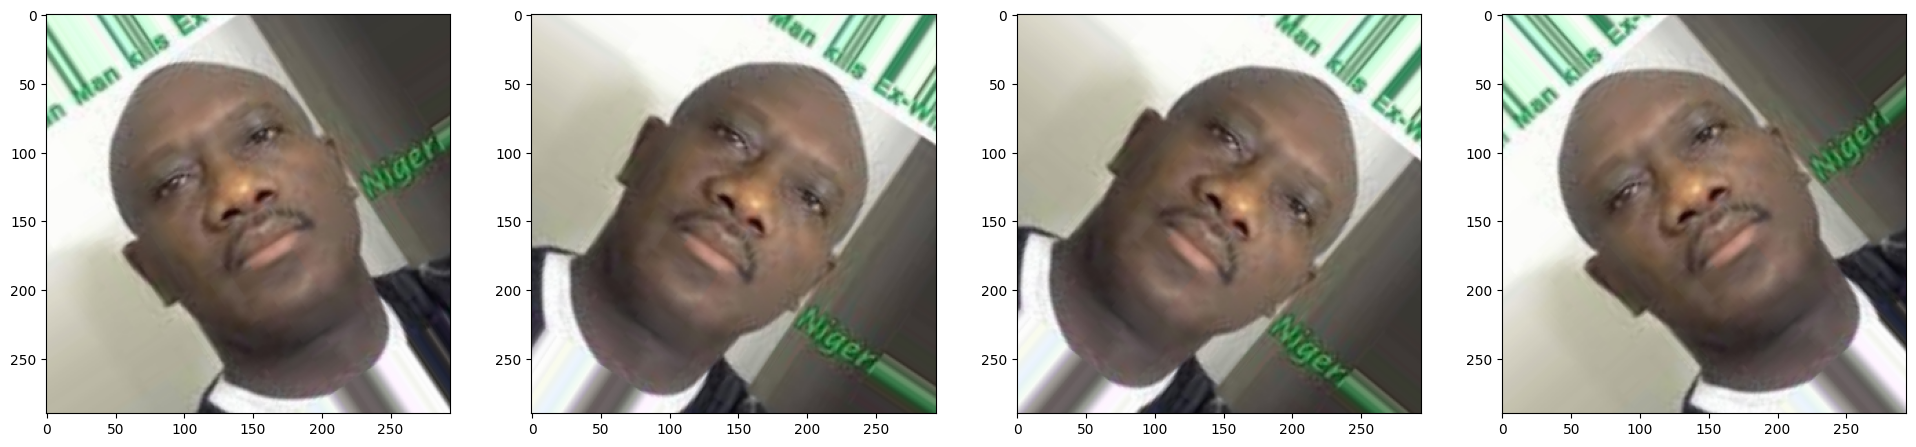

In [13]:
data_generator = ImageDataGenerator(rotation_range=45)
show_aug_image(image, data_generator, n_images=4)

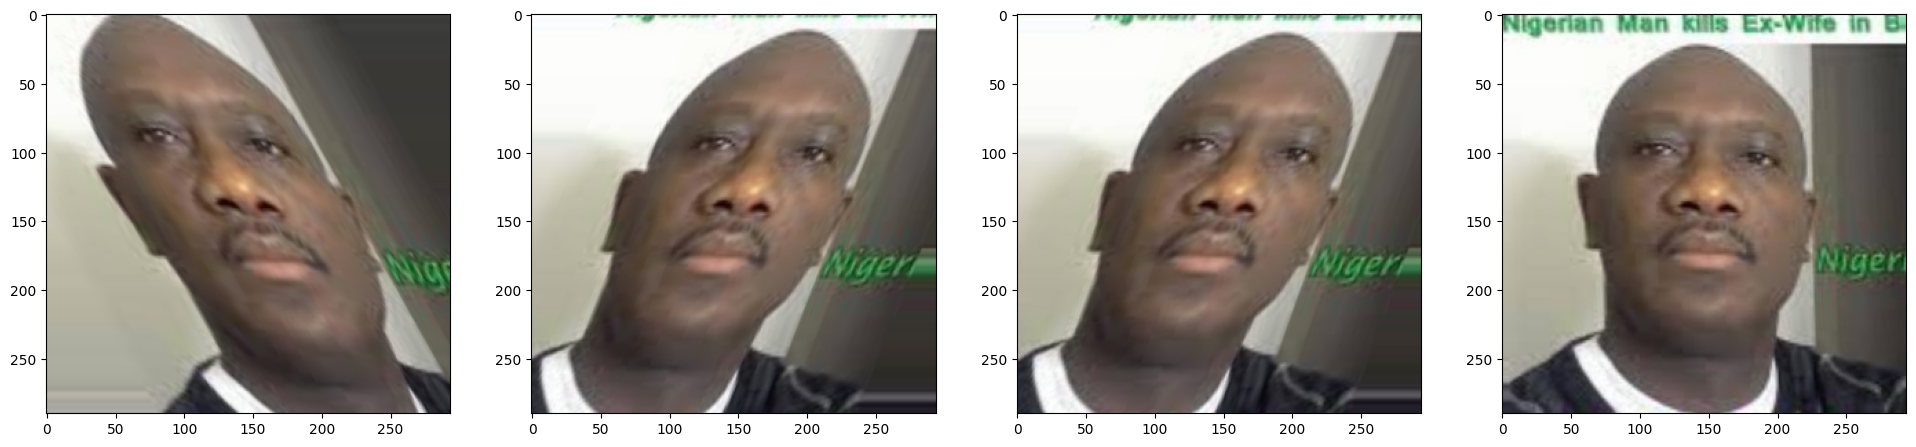

In [15]:
data_generator = ImageDataGenerator(shear_range=45)
show_aug_image(image, data_generator, n_images=4)

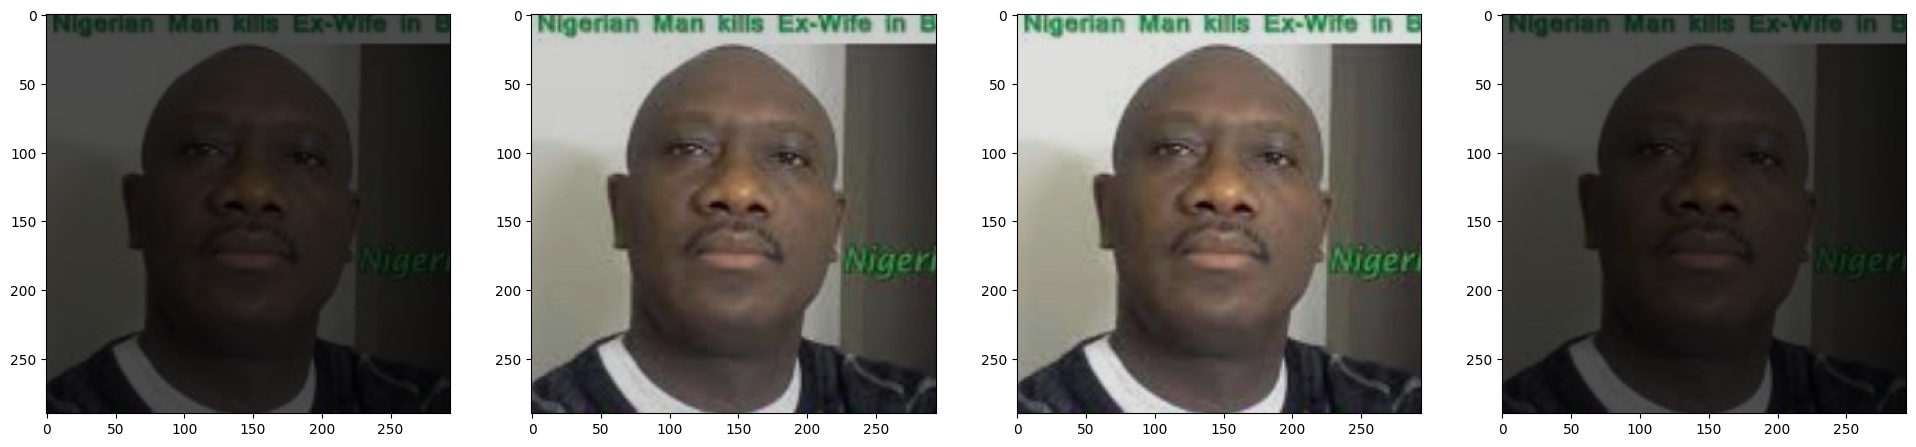

In [17]:
data_generator = ImageDataGenerator(brightness_range=(0.1, 0.9))
show_aug_image(image, data_generator, n_images=4)

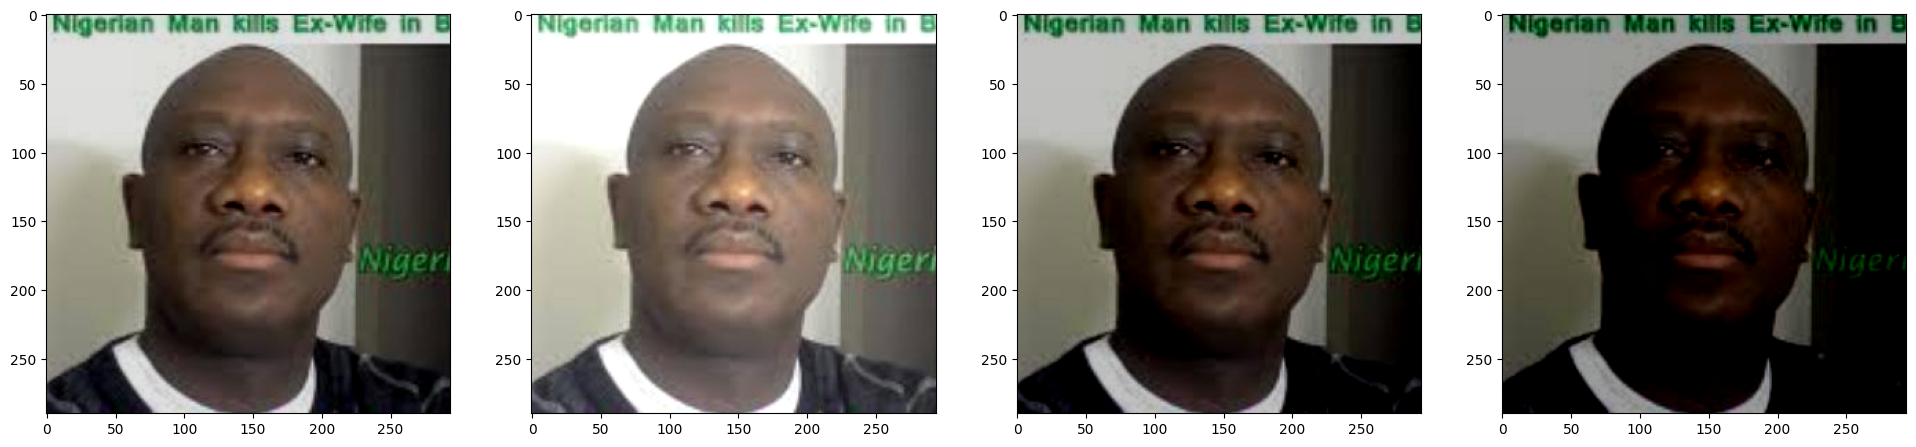

In [20]:
data_generator = ImageDataGenerator(channel_shift_range=150)
show_aug_image(image, data_generator, n_images=4)

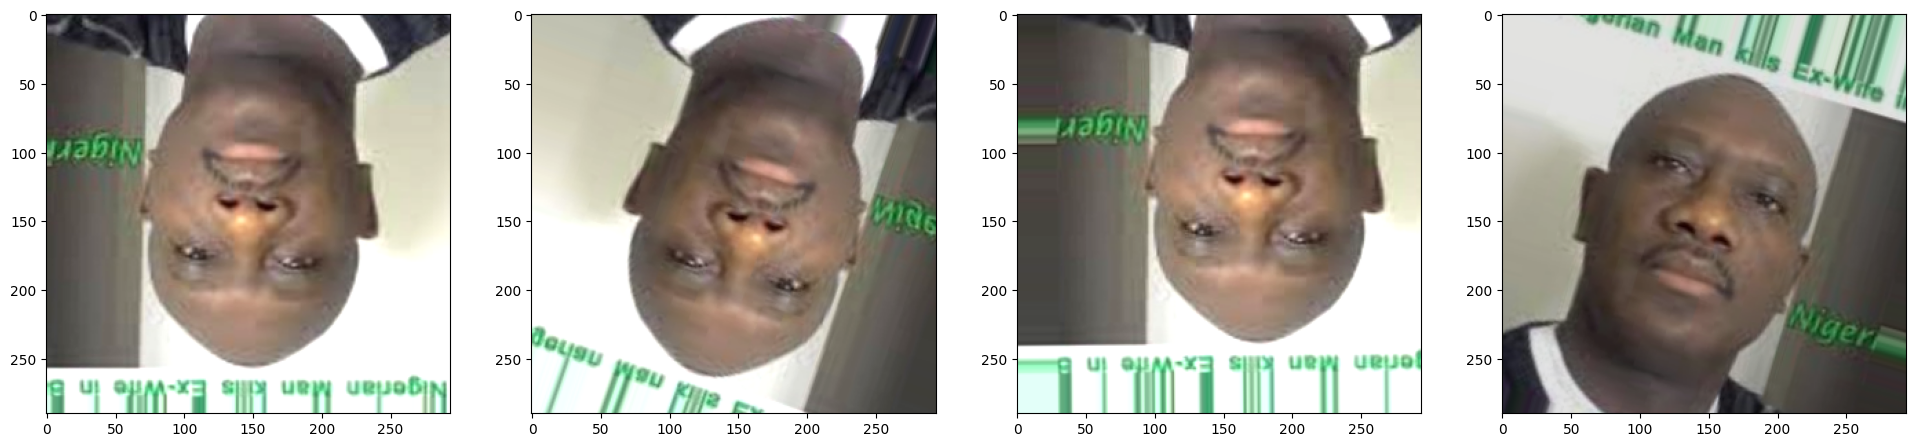

In [19]:
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.7, 1.3),
    horizontal_flip=True,
    vertical_flip=True,
    #rescale=1/255.0 # 학습시 적용, 시각화를 위해 임시로 주석처리
)

show_aug_image(image, data_generator, n_images=4)